# Predicting Stock price Using DecisionTreeClassifier Algorithm

## Step 1:- Data Collection

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Loading dataset

In [2]:
stock = pd.read_csv(r"TATAMOTORS.NS.csv")

In [4]:
stock.head() #this data set has 7 features 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [7]:
stock.shape # the original dataset has 4233 rows and 7 columns

(4233, 7)

In [9]:
stock.info() # Now we can see that Date column is object it means string 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4233 non-null   object 
 1   Open       4226 non-null   float64
 2   High       4226 non-null   float64
 3   Low        4226 non-null   float64
 4   Close      4226 non-null   float64
 5   Adj Close  4226 non-null   float64
 6   Volume     4226 non-null   float64
dtypes: float64(6), object(1)
memory usage: 231.6+ KB


In [10]:
stock.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
4230,2024-01-17,811.000000,813.700012,804.0,805.549988,805.549988,7895439.0
4231,2024-01-18,807.000000,822.950012,797.0,819.049988,819.049988,11500495.0
4232,2024-01-19,823.849976,826.000000,819.5,823.549988,823.549988,5706888.0


In [12]:
print(f'Dataframe cotain stock price between{stock.Date.min()} {stock.Date.max()}')
# this dataset as 2006-12-01 to 2024-01-19 days stock record 

Dataframe cotain stock price between2006-12-01 2024-01-19


## Step 2:- Exploratory Data Analusis 

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '2020-01-10'),
  Text(0.0, 0, '2006-12-01'),
  Text(1000.0, 0, '2010-12-22'),
  Text(2000.0, 0, '2015-01-07'),
  Text(3000.0, 0, '2019-01-24'),
  Text(4000.0, 0, '2023-02-09'),
  Text(5000.0, 0, '')])

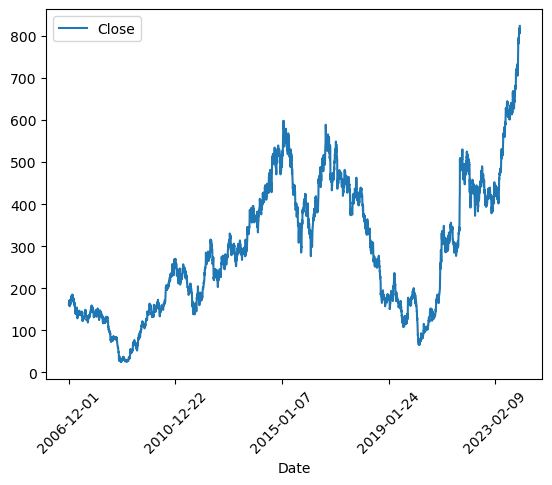

In [13]:
stock.plot(x="Date", y="Close")# this plot shows the closing price of 2000 to 2020 year
plt.xticks(rotation=45)

<Axes: xlabel='Date'>

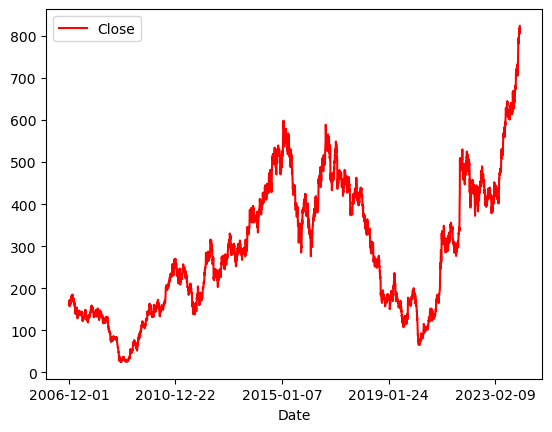

In [8]:
stock.plot(x="Date", y="Close",color='red')# this plot shows the closing price of 2000 to 2020 year

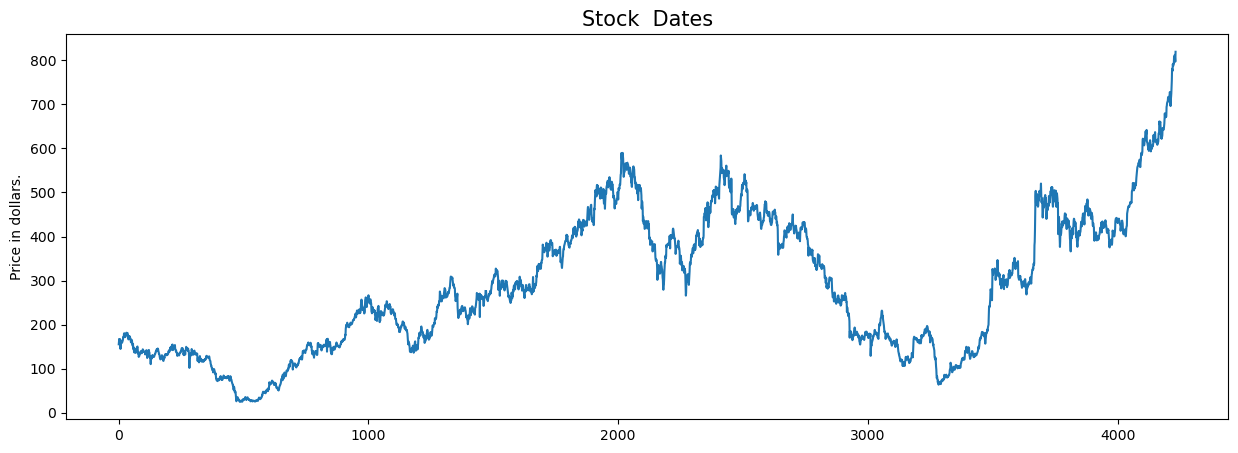

In [9]:
plt.figure(figsize=(15,5))
plt.plot(stock['Low'])
plt.title('Stock  Dates', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

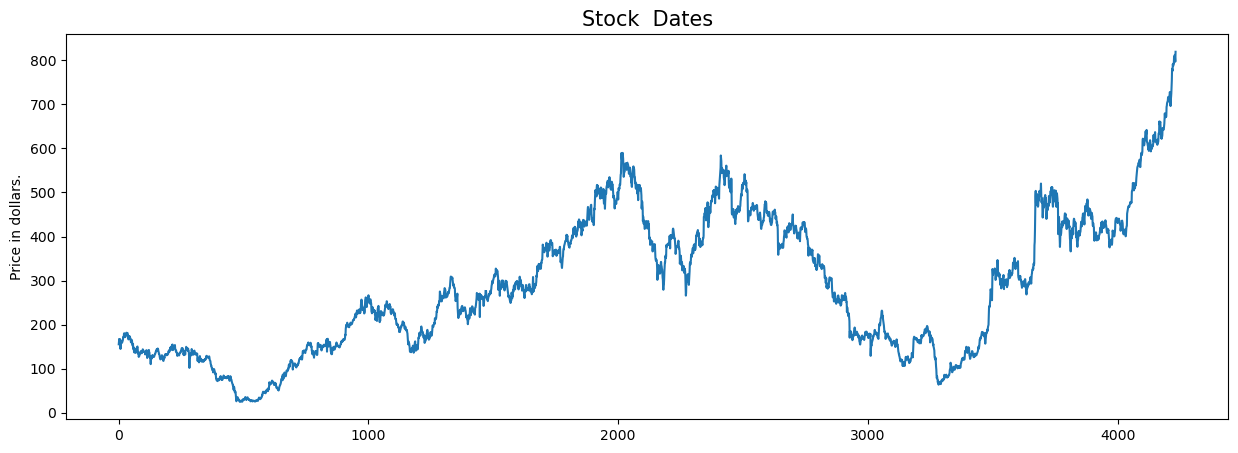

In [11]:
plt.figure(figsize=(15,5))
plt.plot(stock['Low'])
plt.title('Stock  Dates', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

<Axes: xlabel='High', ylabel='Density'>

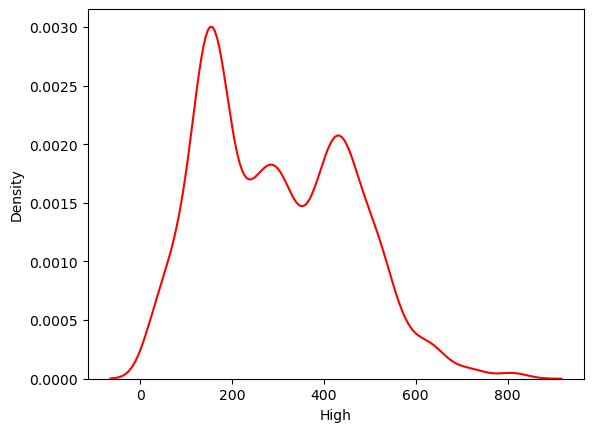

In [12]:
sns.kdeplot(stock['High'],color='red')

## Step 3:- Data preprocessing

### :- Data Cleaning & Headling with missing values

In [14]:
stock.isnull().sum().sum()#On this dataset has total 42 missing values have

42

In [15]:
stock.isna().sum()# expact Date columns all the Column have 7 missing values

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

### Deal with the missing data
* ***There are two ways, we drop the missing value or replace the datas***

In [17]:
stock['Volume'].median() # I volume median value is 10674193.0,so we fill the nan value 

10693392.5

In [18]:
stock['Volume'].replace(np.nan,10693392.5,inplace=True)

In [19]:
stock['Volume'].isnull().sum()# Now volume column is 0 missing value

0

In [20]:
stock.dropna(inplace=True)

## Step 4:- Data Integration and Reduction

In [21]:
x = stock.drop(columns=['Date', 'Open'])  # Assuming 'Date' is not a feature and 'Open' is the target variable
y = stock['Open']

## Step 6:- Data Splitting

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape,x_test.shape

((3380, 5), (846, 5))

In [24]:
x_train

,High,Low,Close,Adj Close,Volume
2171,358.899994,342.250000,344.600006,343.390259,8569963.0
1837,419.698303,413.118896,418.560516,415.316254,3073390.0
1294,272.526886,259.219604,270.449158,261.818604,14977178.0
3302,76.900002,74.000000,74.199997,73.969460,40047438.0
2557,471.549988,461.600006,464.549988,463.106628,5991598.0
...,...,...,...,...,...
3451,175.500000,171.100006,172.050003,171.515442,47695247.0
466,51.240395,45.937275,48.282124,44.431076,6457346.0
3099,161.000000,156.850006,160.449997,159.951477,13368928.0
3779,447.000000,434.600006,435.799988,434.445953,25466395.0


In [25]:
y_test

1617    293.650299
2733    422.000000
2249    343.899994
4137    608.799988
3980    415.750000
           ...    
908     183.036743
80      136.249359
257     146.597412
295     141.806641
1598    298.300415
Name: Open, Length: 846, dtype: float64

## Step 5:-Feature Scaling

In [32]:
MS=MinMaxScaler(feature_range=(0,1))

In [33]:
MS.fit_transform(x_train)

array([[0.41545305, 0.40311382, 0.40188542, 0.40192044, 0.0271194 ],
       [0.49137586, 0.49307695, 0.49516294, 0.49239597, 0.00972565],
       [0.30759333, 0.29771251, 0.30836786, 0.29931167, 0.04739484],
       ...,
       [0.16832244, 0.16776143, 0.16963911, 0.17117327, 0.04230558],
       [0.52546926, 0.52034572, 0.51690502, 0.51645917, 0.08058766],
       [0.15898582, 0.15845178, 0.15984268, 0.14926246, 0.05594969]])

## Step 7:- Model Training 

In [35]:
from sklearn.tree import DecisionTreeRegressor 

In [36]:
dt= DecisionTreeRegressor(max_depth=5)

In [37]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

## Model Evaluation

In [38]:
from sklearn.metrics import r2_score

In [39]:
y_pred = dt.predict(x_train)

In [34]:
from sklearn.metrics import r2_score
#r2 = r2_score(y_test, predict)
print(r2_score(y_train, y_pred))

0.9980859281227569


In [42]:
next_day_features = x.iloc[[-1]]  # Assuming the last row contains the latest features
next_day_opening_price = dt.predict(next_day_features)
print("Predicted next day's opening price:", next_day_opening_price)

Predicted next day's opening price: [803.91364073]
